In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('/Users/ibarra/Rappi/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geo = pd.read_csv('/Users/ibarra/Rappi/olist_geolocation_dataset.csv')
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
print(geo.geolocation_zip_code_prefix.count(),geo.geolocation_zip_code_prefix.nunique())

1000163 19015


In [5]:
geo.sort_values(by=['geolocation_zip_code_prefix'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
...,...,...,...,...,...
1000026,99980,-28.388679,-51.848863,david canabarro,RS
999950,99980,-28.388400,-51.845225,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [6]:
geo = geo.drop_duplicates(subset=['geolocation_zip_code_prefix'])
print(geo.geolocation_zip_code_prefix.count(),geo.geolocation_zip_code_prefix.nunique())

19015 19015


In [7]:
items = pd.read_csv('/Users/ibarra/Rappi/olist_order_items_dataset.csv')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order = pd.read_csv('/Users/ibarra/Rappi/olist_orders_dataset.csv')
order['order_delivered_carrier_date'] = pd.to_datetime(order.order_delivered_carrier_date)
order['order_delivered_customer_date'] = pd.to_datetime(order.order_delivered_customer_date)
order['order_estimated_delivery_date'] = pd.to_datetime(order.order_estimated_delivery_date)
order['order_purchase_timestamp'] = pd.to_datetime(order.order_purchase_timestamp)
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
seller = pd.read_csv('/Users/ibarra/Rappi/olist_sellers_dataset.csv')
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Bases

In [10]:
order['time_delivery'] = order['order_delivered_customer_date'] - order['order_delivered_carrier_date'] 
order['time_vs_estimate'] = order['order_estimated_delivery_date'] - order['order_delivered_customer_date']
order['time_prepared'] = order['order_delivered_carrier_date'] - order['order_purchase_timestamp']
order['time_delivery_float'] = order['time_delivery'].dt.total_seconds() / (24 * 60 * 60)
order['time_vs_estimate_float'] = order['time_vs_estimate'].dt.total_seconds() / (24 * 60 * 60)
order['time_prepared_float'] = order['time_prepared'].dt.total_seconds() / (24 * 60 * 60)
order['hour_order'] = order['order_purchase_timestamp'].dt.hour
order['hour_delivery'] = order['order_delivered_carrier_date'].dt.hour
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delivery,time_vs_estimate,time_prepared,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,7 days 02:34:47,2 days 08:58:27,6.062650,7.107488,2.373924,10,19.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,5 days 08:32:15,1 days 17:49:23,12.039410,5.355729,1.742627,20,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,17 days 05:53:31,0 days 05:11:11,9.178113,17.245498,0.216100,8,13.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,12 days 23:31:18,3 days 18:11:53,9.450498,12.980069,3.758252,19,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,9 days 05:42:58,0 days 22:27:55,1.937824,9.238171,0.936053,21,19.0


array([[<AxesSubplot:title={'center':'time_vs_estimate_float'}>,
        <AxesSubplot:title={'center':'time_prepared_float'}>],
       [<AxesSubplot:title={'center':'hour_order'}>,
        <AxesSubplot:title={'center':'hour_delivery'}>]], dtype=object)

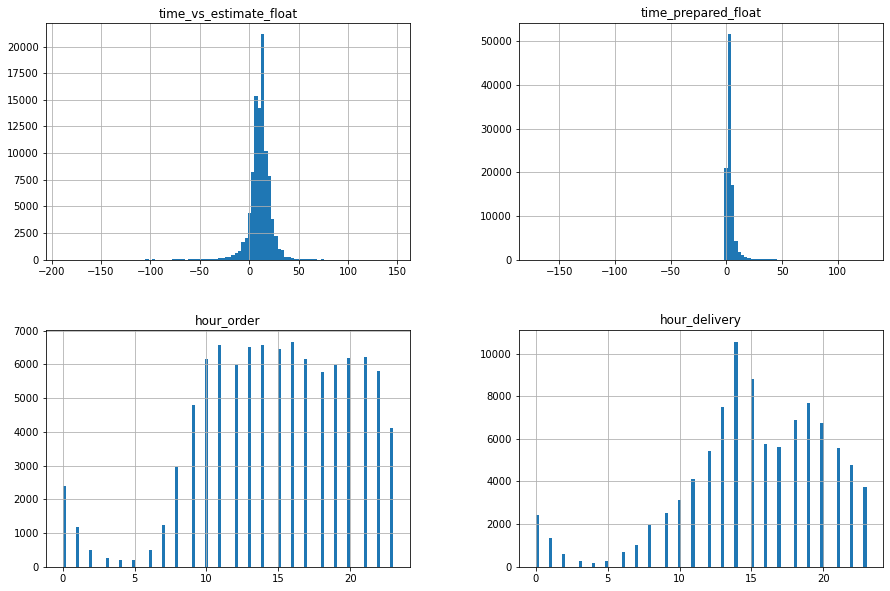

In [12]:
order[['time_vs_estimate_float','time_prepared_float',
      'hour_order','hour_delivery']].hist(bins=100,figsize=(15,10))

In [13]:
order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [41]:
base = pd.merge(order.loc[order['order_status']=='delivered'],customers,how="inner",on='customer_id')
base = pd.merge(base,items,how="inner",on='order_id')
base = pd.merge(base,seller,how="inner",on='seller_id')
base.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delivery,time_vs_estimate,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,7 days 02:34:47,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,5 days 05:11:01,6 days 04:56:24,...,SP,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350,maua,SP
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,2017-07-12 14:11:58,2017-07-12 14:30:18,2017-07-13 12:47:05,2017-07-18 16:24:42,2017-07-25,5 days 03:37:37,6 days 07:35:18,...,SP,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-18 14:30:18,44.99,7.78,9350,maua,SP
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,delivered,2017-07-24 22:16:25,2017-07-25 22:25:11,2017-07-26 14:57:42,2017-07-28 19:06:46,2017-08-04,2 days 04:09:04,6 days 04:53:14,...,SP,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-31 22:25:11,44.99,7.78,9350,maua,SP
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,delivered,2017-08-19 14:06:58,2017-08-22 04:10:55,2017-08-23 13:54:29,2017-08-29 19:35:06,2017-09-15,6 days 05:40:37,16 days 04:24:54,...,RS,1,d7faab3fa0091d1220a8ada9cae1bab3,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-28 04:10:55,29.90,14.10,9350,maua,SP


In [42]:
base = base.drop(columns=['customer_id','customer_unique_id','order_item_id','product_id','seller_id','freight_value',
                         'time_delivery','time_vs_estimate','time_prepared','order_delivered_customer_date',
                         'order_delivered_carrier_date','order_estimated_delivery_date','order_purchase_timestamp',
                         'order_approved_at','shipping_limit_date','order_status','customer_city','customer_state',
                         'seller_city','seller_state'])
base = base.copy()
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,customer_zip_code_prefix,price,seller_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,3149,29.99,9350
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,8577,75.90,9350
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,13820,44.99,9350
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,6298,44.99,9350
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,94130,29.90,9350


In [43]:
base = pd.merge(base,geo[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']]
                ,how='left',left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')
base = base.rename(columns={'geolocation_lat':'geolocation_lat_seller','geolocation_lng':'geolocation_lng_seller'})
base = base.drop(columns=['geolocation_zip_code_prefix'])
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,customer_zip_code_prefix,price,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,3149,29.99,9350,-23.680114,-46.452454
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,8577,75.90,9350,-23.680114,-46.452454
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,13820,44.99,9350,-23.680114,-46.452454
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,6298,44.99,9350,-23.680114,-46.452454
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,94130,29.90,9350,-23.680114,-46.452454


In [44]:
base = pd.merge(base,geo[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']]
                ,how='left',left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')
base = base.rename(columns={'geolocation_lat':'geolocation_lat_customer','geolocation_lng':'geolocation_lng_customer'})
base = base.drop(columns=['geolocation_zip_code_prefix'])
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,customer_zip_code_prefix,price,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,geolocation_lat_customer,geolocation_lng_customer
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,3149,29.99,9350,-23.680114,-46.452454,-23.574809,-46.587471
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,8577,75.90,9350,-23.680114,-46.452454,-23.482623,-46.374490
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,13820,44.99,9350,-23.680114,-46.452454,-22.689713,-46.982493
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,6298,44.99,9350,-23.680114,-46.452454,-23.509894,-46.762148
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,94130,29.90,9350,-23.680114,-46.452454,-29.921553,-51.038485


In [45]:
base = base.dropna()

In [46]:
from geopy import Point
from geopy.distance import distance

base['point_seller'] = base.apply(lambda row: Point(latitude=row['geolocation_lat_seller'], longitude=row['geolocation_lng_seller']), axis=1)
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,customer_zip_code_prefix,price,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,geolocation_lat_customer,geolocation_lng_customer,point_seller
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,3149,29.99,9350,-23.680114,-46.452454,-23.574809,-46.587471,"23 40m 48.4119s S, 46 27m 8.83348s W"
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,8577,75.90,9350,-23.680114,-46.452454,-23.482623,-46.374490,"23 40m 48.4119s S, 46 27m 8.83348s W"
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,13820,44.99,9350,-23.680114,-46.452454,-22.689713,-46.982493,"23 40m 48.4119s S, 46 27m 8.83348s W"
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,6298,44.99,9350,-23.680114,-46.452454,-23.509894,-46.762148,"23 40m 48.4119s S, 46 27m 8.83348s W"
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,94130,29.90,9350,-23.680114,-46.452454,-29.921553,-51.038485,"23 40m 48.4119s S, 46 27m 8.83348s W"


In [47]:
base =  base.copy()
base['point_customer'] = base.apply(lambda row: Point(latitude=row['geolocation_lat_customer'], longitude=row['geolocation_lng_customer']), axis=1)
base =  base.copy()
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,customer_zip_code_prefix,price,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,geolocation_lat_customer,geolocation_lng_customer,point_seller,point_customer
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,3149,29.99,9350,-23.680114,-46.452454,-23.574809,-46.587471,"23 40m 48.4119s S, 46 27m 8.83348s W","23 34m 29.3132s S, 46 35m 14.8965s W"
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,8577,75.90,9350,-23.680114,-46.452454,-23.482623,-46.374490,"23 40m 48.4119s S, 46 27m 8.83348s W","23 28m 57.4444s S, 46 22m 28.1623s W"
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,13820,44.99,9350,-23.680114,-46.452454,-22.689713,-46.982493,"23 40m 48.4119s S, 46 27m 8.83348s W","22 41m 22.9652s S, 46 58m 56.9749s W"
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,6298,44.99,9350,-23.680114,-46.452454,-23.509894,-46.762148,"23 40m 48.4119s S, 46 27m 8.83348s W","23 30m 35.6184s S, 46 45m 43.7311s W"
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,94130,29.90,9350,-23.680114,-46.452454,-29.921553,-51.038485,"23 40m 48.4119s S, 46 27m 8.83348s W","29 55m 17.5917s S, 51 2m 18.547s W"


In [48]:
base['distance_km'] = base.apply(lambda row: distance(row['point_seller'], row['point_customer']).km, axis=1)
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,customer_zip_code_prefix,price,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,geolocation_lat_customer,geolocation_lng_customer,point_seller,point_customer,distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,3149,29.99,9350,-23.680114,-46.452454,-23.574809,-46.587471,"23 40m 48.4119s S, 46 27m 8.83348s W","23 34m 29.3132s S, 46 35m 14.8965s W",18.051106
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,8577,75.90,9350,-23.680114,-46.452454,-23.482623,-46.374490,"23 40m 48.4119s S, 46 27m 8.83348s W","23 28m 57.4444s S, 46 22m 28.1623s W",23.275435
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,13820,44.99,9350,-23.680114,-46.452454,-22.689713,-46.982493,"23 40m 48.4119s S, 46 27m 8.83348s W","22 41m 22.9652s S, 46 58m 56.9749s W",122.373445
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,6298,44.99,9350,-23.680114,-46.452454,-23.509894,-46.762148,"23 40m 48.4119s S, 46 27m 8.83348s W","23 30m 35.6184s S, 46 45m 43.7311s W",36.804660
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,94130,29.90,9350,-23.680114,-46.452454,-29.921553,-51.038485,"23 40m 48.4119s S, 46 27m 8.83348s W","29 55m 17.5917s S, 51 2m 18.547s W",828.124043


In [49]:
base = base.drop(columns=['customer_zip_code_prefix','seller_zip_code_prefix','geolocation_lat_seller',
                          'geolocation_lng_seller','geolocation_lat_customer','geolocation_lng_customer',
                          'point_seller','point_customer','time_vs_estimate_float','price'])
base.head()

,order_id,time_delivery_float,time_vs_estimate_float,time_prepared_float,hour_order,hour_delivery,price,distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,7.107488,2.373924,10,19.0,29.99,18.051106
1,8736140c61ea584cb4250074756d8f3b,5.215984,6.205833,1.011574,13,13.0,75.90,23.275435
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,6.316181,0.941053,14,12.0,44.99,122.373445
3,a3bf941183211246f0d42ad757cba127,2.172963,6.203634,1.695336,22,14.0,44.99,36.804660
4,1462290799412b71be32dd880eaf4e1b,6.236539,16.183958,3.991331,14,13.0,29.90,828.124043


In [52]:
base.head()

,order_id,time_delivery_float,time_prepared_float,hour_order,hour_delivery,distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,6.062650,2.373924,10,19.0,18.051106
1,8736140c61ea584cb4250074756d8f3b,5.215984,1.011574,13,13.0,23.275435
2,a0151737f2f0c6c0a5fd69d45f66ceea,5.151123,0.941053,14,12.0,122.373445
3,a3bf941183211246f0d42ad757cba127,2.172963,1.695336,22,14.0,36.804660
4,1462290799412b71be32dd880eaf4e1b,6.236539,3.991331,14,13.0,828.124043


In [53]:
base.time_delivery_float.mean()

9.177614185737006

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca = scaler.fit(base[['time_prepared_float','hour_order','hour_delivery','distance_km']])
scaled = scaler.transform(base[['time_prepared_float','hour_order','hour_delivery','distance_km']])
scaled = pd.DataFrame(scaled,columns=['time_prepared_float','hour_order','hour_delivery','distance_km'])
scaled.head()

,time_prepared_float,hour_order,hour_delivery,distance_km
0,-0.249566,-0.893553,0.756583,-0.981148
1,-0.622427,-0.329132,-0.405412,-0.972269
2,-0.641728,-0.140992,-0.599078,-0.803853
3,-0.435288,1.364130,-0.211746,-0.949276
4,0.193102,-0.140992,-0.405412,0.395561


In [55]:
correlated_features = set()
correlation_matrix = scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

set()

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [57]:
X = scaled
target = base['time_delivery_float']

rfc = RandomForestRegressor(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, scoring='explained_variance',cv=5)
rfecv.fit(X, target)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=42),
      scoring='explained_variance')

In [58]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


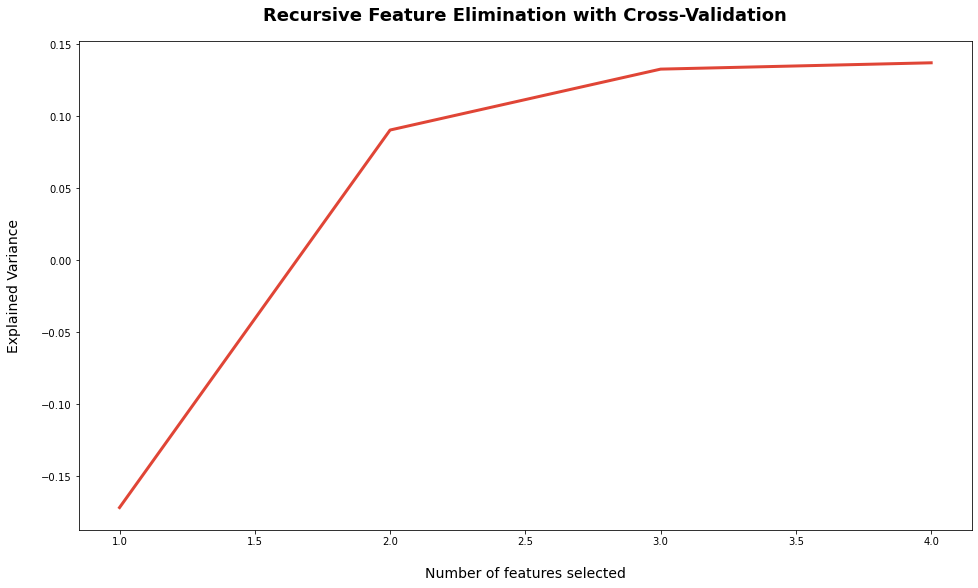

In [64]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Explained Variance', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#e04536ff', linewidth=3)

plt.show()

In [60]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[]


In [61]:
X = X.rename(columns={'time_prepared_float':'Time Prepared','hour_order':'Hour Order','hour_delivery':'Hour Delivery'
                      ,'distance_km':'Distance'})
X.head()

,Time Prepared,Hour Order,Hour Delivery,Distance
0,-0.249566,-0.893553,0.756583,-0.981148
1,-0.622427,-0.329132,-0.405412,-0.972269
2,-0.641728,-0.140992,-0.599078,-0.803853
3,-0.435288,1.364130,-0.211746,-0.949276
4,0.193102,-0.140992,-0.405412,0.395561


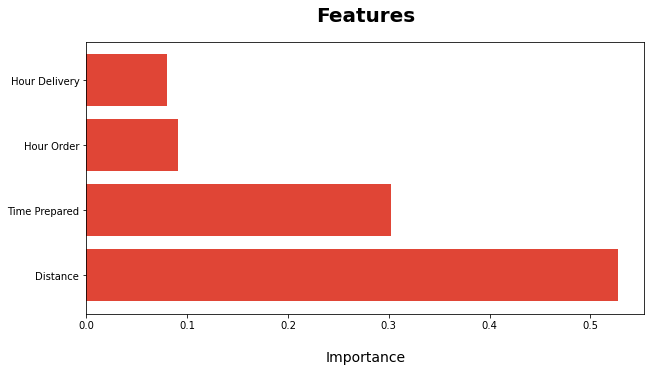

In [66]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 5))
plt.barh(y=dset['attr'], width=dset['importance'], color='#e04536ff')
plt.title('Features', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()